hummingbird is an open-source library which has  been provided by Microsoft. this library is compatible with Python  3.5 3.6 3.7 and 3.8

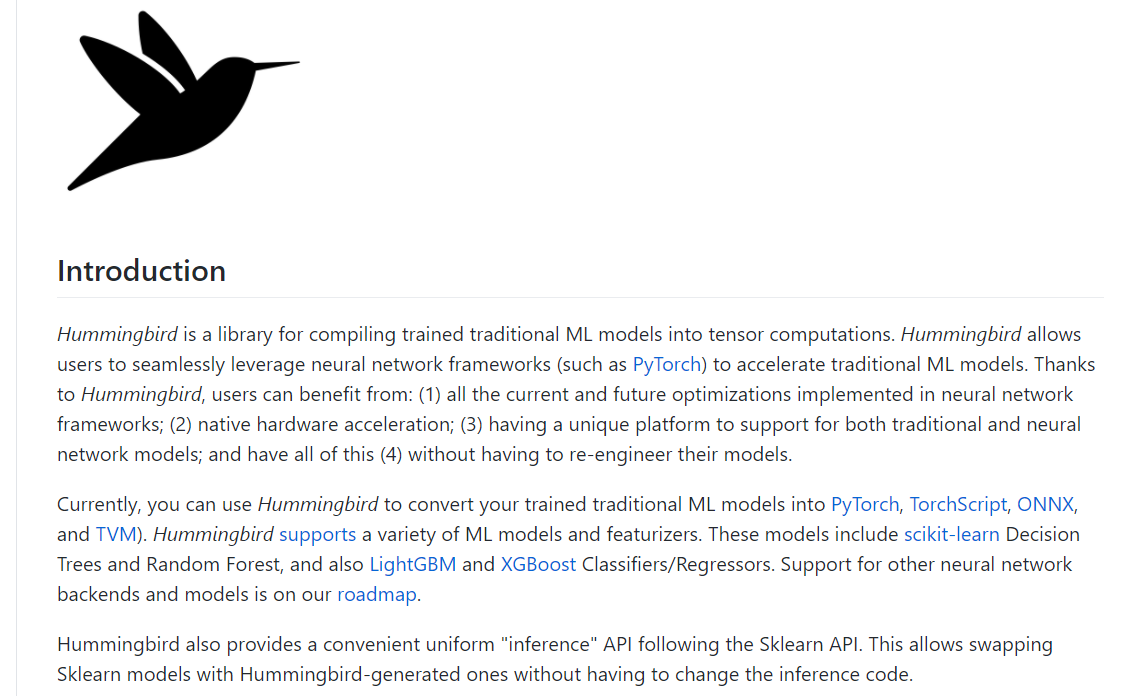

below is an example that was run on google colab. the example was taken from hummingbird github [link](https://github.com/microsoft/hummingbird) 

In [1]:
# set the runtime to GPU

In [ ]:
pip install hummingbird-ml

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from hummingbird.ml import convert

In [ ]:
# Create some random data for binary classification
num_classes = 2
X = np.random.rand(100000, 28)
y = np.random.randint(num_classes, size=100000)

In [ ]:
# Create and train a model (scikit-learn RandomForestClassifier in this case)
skl_model = RandomForestClassifier(n_estimators=10, max_depth=10)
skl_model.fit(X, y)

In [ ]:
# Use Hummingbird to convert the model to PyTorch
model = convert(skl_model, 'pytorch')

In [ ]:
# Run predictions on CPU
%%timeit -r 3

model.predict(X) # default runs on gpu

In [ ]:
# Run predictions on GPU
%%timeit

model.to('cuda') # to make sure it runs on GPU
model.predict(X)

#so the time reduced from 161ms to 12ms 

In [ ]:
# Save the model
model.save('hb_model')

# Load the model back
import hummingbird.ml
model = hummingbird.ml.load('hb_model')

#### more example can be got from the [link](https://github.com/microsoft/hummingbird/tree/main/notebooks)